# quant-econ Solutions: Modeling Career Choice

Solutions for http://quant-econ.net/py/career.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import DiscreteRV, compute_fixed_point
from career import CareerWorkerProblem

## Exercise 1


Simulate job / career paths.  

In reading the code, recall that `optimal_policy[i, j]` = policy at
$(\theta_i, \epsilon_j)$ = either 1, 2 or 3; meaning 'stay put', 'new job' and
'new life'.



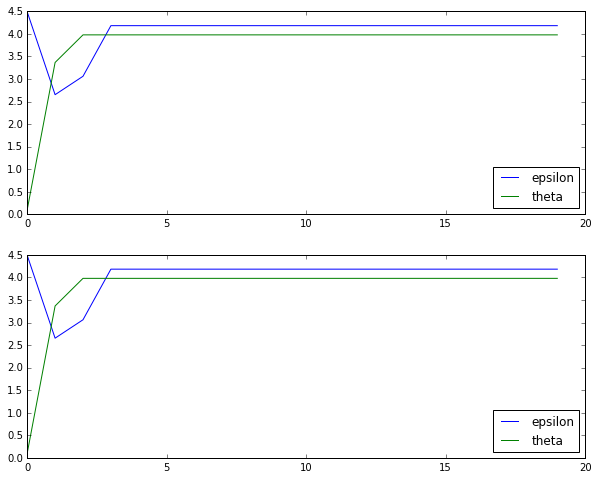

In [3]:
wp = CareerWorkerProblem()
v_init = np.ones((wp.N, wp.N))*100
v = compute_fixed_point(wp.bellman_operator, v_init, verbose=False)
optimal_policy = wp.get_greedy(v)
F = DiscreteRV(wp.F_probs)
G = DiscreteRV(wp.G_probs)

def gen_path(T=20):
    i = j = 0  
    theta_index = []
    epsilon_index = []
    for t in range(T):
        if optimal_policy[i, j] == 1:    # Stay put
            pass
        elif optimal_policy[i, j] == 2:  # New job
            j = int(G.draw())
        else:                            # New life
            i, j  = int(F.draw()), int(G.draw())
        theta_index.append(i)
        epsilon_index.append(j)
    return wp.theta[theta_index], wp.epsilon[epsilon_index]

theta_path, epsilon_path = gen_path()

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
for ax in axes:
    ax.plot(epsilon_path, label='epsilon')
    ax.plot(theta_path, label='theta')
    ax.legend(loc='lower right')

plt.show()



## Exercise 2

The median for the original parameterization can be computed as follows

In [4]:

wp = CareerWorkerProblem()
v_init = np.ones((wp.N, wp.N))*100
v = compute_fixed_point(wp.bellman_operator, v_init)
optimal_policy = wp.get_greedy(v)
F = DiscreteRV(wp.F_probs)
G = DiscreteRV(wp.G_probs)

def gen_first_passage_time():
    t = 0
    i = j = 0
    while 1:
        if optimal_policy[i, j] == 1:    # Stay put
            return t
        elif optimal_policy[i, j] == 2:  # New job
            j = int(G.draw())
        else:                            # New life
            i, j  = int(F.draw()), int(G.draw())
        t += 1

M = 25000 # Number of samples
samples = np.empty(M)
for i in range(M): 
    samples[i] = gen_first_passage_time()
print(np.median(samples))


Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            4.073e+00      9.388e-02         
10           3.151e+00      1.871e-01         
15           2.438e+00      2.811e-01         
20           1.887e+00      3.741e-01         
25           1.460e+00      4.675e-01         
30           1.130e+00      5.603e-01         
35           8.741e-01      6.537e-01         
40           6.764e-01      7.467e-01         
45           5.234e-01      8.400e-01         
50           4.050e-01      9.336e-01         
7.0


To compute the median with $\beta=0.99$ instead of the default value $\beta=0.95$,
replace `wp = CareerWorkerProblem()` with `wp = CareerWorkerProblem(beta=0.99)`

The medians are subject to randomness, but should be about 7 and 11
respectively.  Not surprisingly, more patient workers will wait longer to settle down to their final job



## Exercise 3

Here’s the code to reproduce the original figure

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            4.073e+00      9.415e-02         
10           3.151e+00      1.866e-01         
15           2.438e+00      2.793e-01         
20           1.887e+00      3.721e-01         
25           1.460e+00      4.647e-01         
30           1.130e+00      5.568e-01         
35           8.741e-01      6.499e-01         
40           6.764e-01      7.424e-01         
45           5.234e-01      8.348e-01         
50           4.050e-01      9.276e-01         


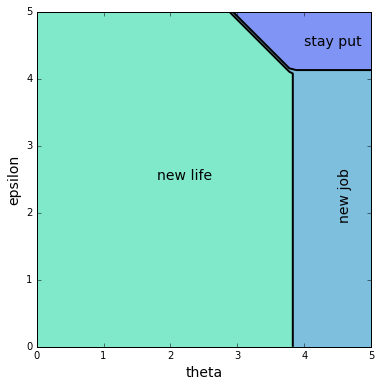

In [5]:
from matplotlib import cm

wp = CareerWorkerProblem()
v_init = np.ones((wp.N, wp.N))*100
v = compute_fixed_point(wp.bellman_operator, v_init)
optimal_policy = wp.get_greedy(v)

fig, ax = plt.subplots(figsize=(6,6))
tg, eg = np.meshgrid(wp.theta, wp.epsilon)
lvls=(0.5, 1.5, 2.5, 3.5)
ax.contourf(tg, eg, optimal_policy.T, levels=lvls, cmap=cm.winter, alpha=0.5)
ax.contour(tg, eg, optimal_policy.T, colors='k', levels=lvls, linewidths=2)
ax.set_xlabel('theta', fontsize=14)
ax.set_ylabel('epsilon', fontsize=14)
ax.text(1.8, 2.5, 'new life', fontsize=14)
ax.text(4.5, 2.5, 'new job', fontsize=14, rotation='vertical')
ax.text(4.0, 4.5, 'stay put', fontsize=14)



Now we want to set `G_a = G_b = 100` and generate a new figure with these parameters. 

To do this replace:

    wp = CareerWorkerProblem()

with:

    wp = CareerWorkerProblem(G_a=100, G_b=100)

In the new figure, you will see that the region for which the worker will stay put has grown because the distribution for $\epsilon$ has become more concentrated around the mean, making high-paying jobs less realistic
